In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
data.shape

(30, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


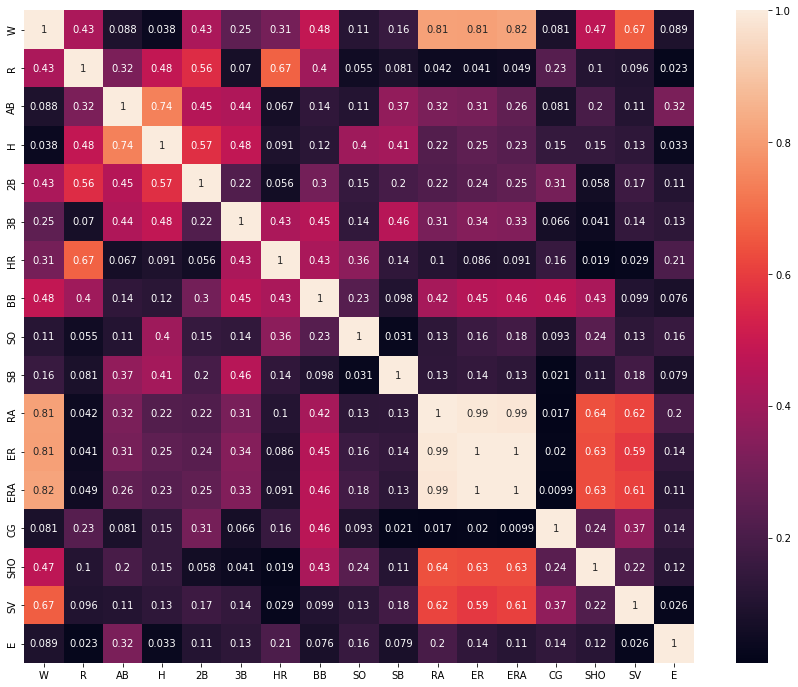

In [8]:
data_corr = data.corr().abs()

plt.figure(figsize = (15,12))
sns.heatmap(data_corr, annot = True,)
plt.show()

there is a strong relation between RA,ER,ERA.

<AxesSubplot:xlabel='R', ylabel='Density'>

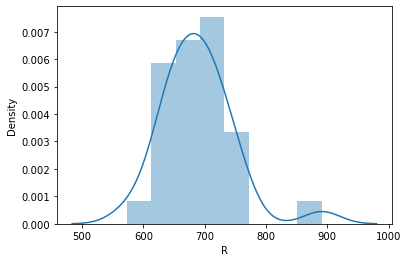

In [9]:
sns.distplot(data.R)

<AxesSubplot:xlabel='AB', ylabel='Density'>

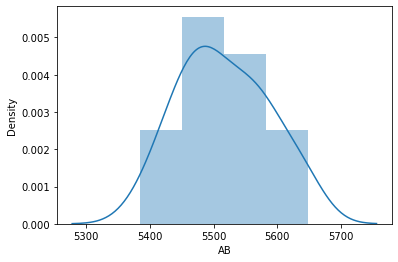

In [10]:
sns.distplot(data.AB)

<AxesSubplot:xlabel='H', ylabel='Density'>

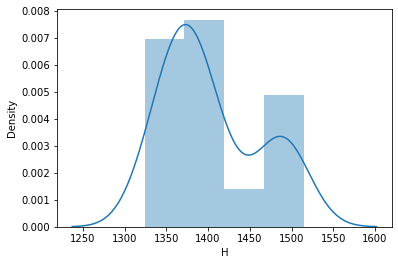

In [11]:
sns.distplot(data.H)

In [31]:
data.rename(columns = {'2B': 'Double', '3B':'Triple'}, inplace = True)

In [32]:
data

,W,R,AB,H,Double,Triple,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


<AxesSubplot:xlabel='Double', ylabel='Density'>

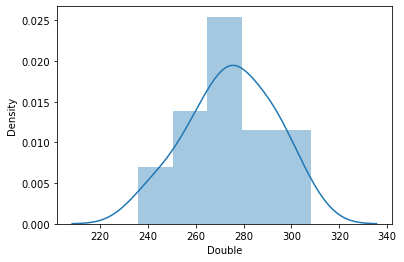

In [33]:
sns.distplot(data.Double)

<AxesSubplot:xlabel='Triple', ylabel='Density'>

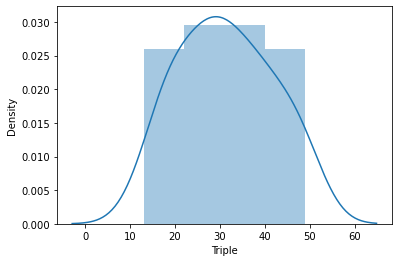

In [34]:
sns.distplot(data.Triple)

<AxesSubplot:xlabel='HR', ylabel='Density'>

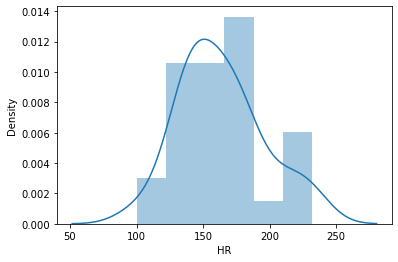

In [35]:
sns.distplot(data.HR)

<AxesSubplot:xlabel='BB', ylabel='Density'>

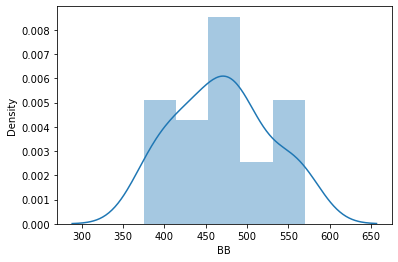

In [36]:
sns.distplot(data.BB)

In [37]:
SO	SB	RA	ER	ERA	CG	SHO	SV	E

SyntaxError: invalid syntax (3689400050.py, line 1)

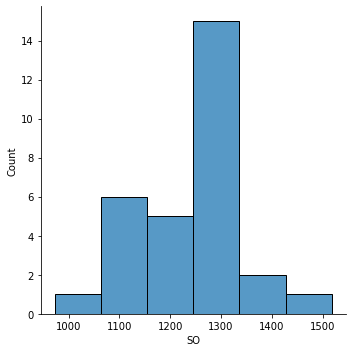

In [38]:
sns.displot(data.SO)

<AxesSubplot:xlabel='SB', ylabel='Density'>

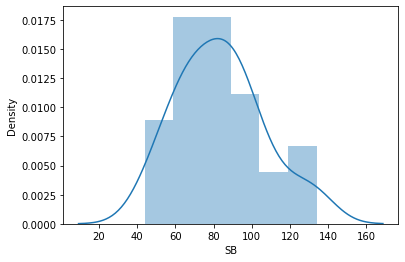

In [39]:
sns.distplot(data.SB)

<AxesSubplot:xlabel='RA', ylabel='Density'>

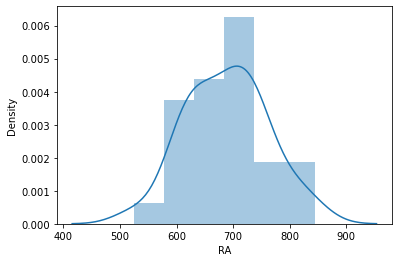

In [41]:
sns.distplot(data.RA)

<AxesSubplot:xlabel='ER', ylabel='Density'>

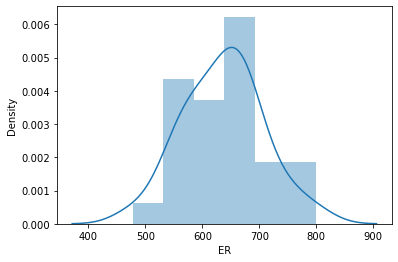

In [42]:
sns.distplot(data.ER)

<AxesSubplot:xlabel='ERA', ylabel='Density'>

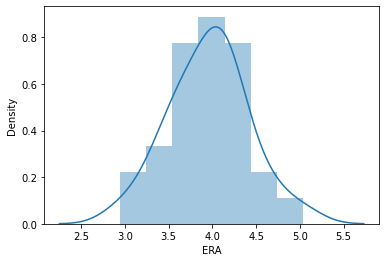

In [43]:
sns.distplot(data.ERA)

<AxesSubplot:xlabel='CG', ylabel='Density'>

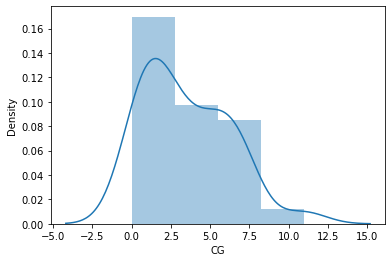

In [44]:
sns.distplot(data.CG)

<AxesSubplot:xlabel='SHO', ylabel='Density'>

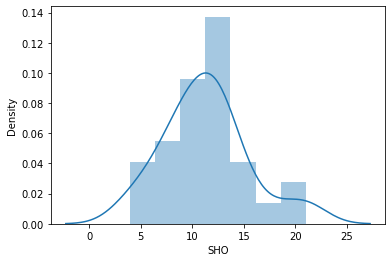

In [45]:
sns.distplot(data.SHO)

<AxesSubplot:xlabel='SV', ylabel='Density'>

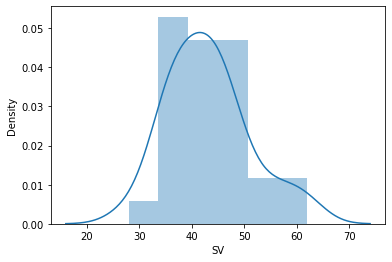

In [46]:
sns.distplot(data.SV)

<AxesSubplot:xlabel='E', ylabel='Density'>

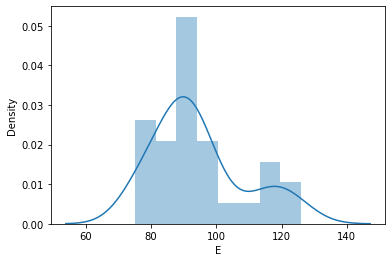

In [48]:
sns.distplot(data.E)

2Variable Analysis

<AxesSubplot:xlabel='R', ylabel='W'>

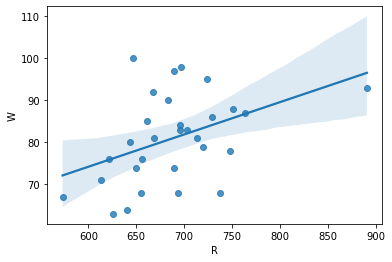

In [49]:
sns.regplot(x='R', y='W', data=data)

<AxesSubplot:xlabel='ER', ylabel='W'>

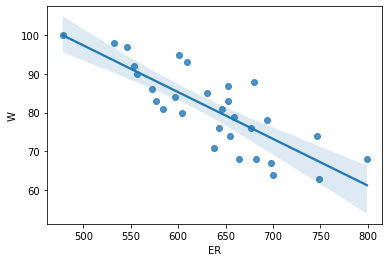

In [50]:
sns.regplot(x='ER', y='W', data=data)

<AxesSubplot:xlabel='ER', ylabel='W'>

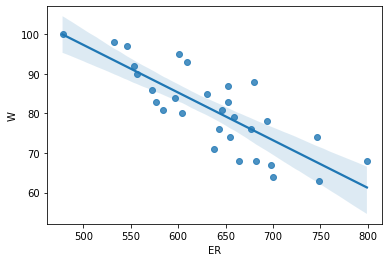

In [51]:
sns.regplot(x='ER', y='W', data=data)

<AxesSubplot:xlabel='ERA', ylabel='W'>

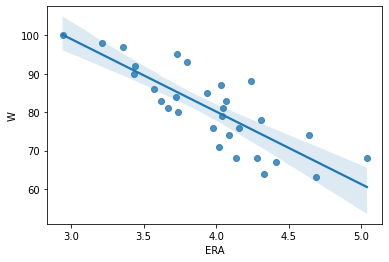

In [52]:
sns.regplot(x='ERA', y='W', data=data)

R is positively proportional to W, where as ER and ERA is negetively proportional to W

<AxesSubplot:xlabel='R', ylabel='ER'>

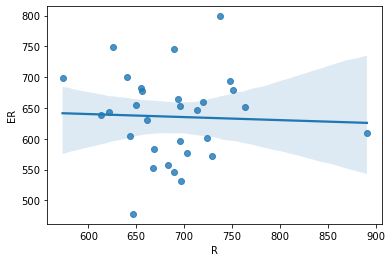

In [53]:
sns.regplot(x='R',y='ER',data = data)

<AxesSubplot:xlabel='R', ylabel='ERA'>

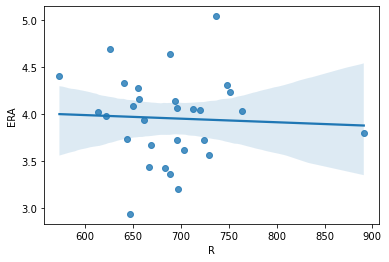

In [55]:
sns.regplot(x='R',y='ERA',data = data)

<AxesSubplot:xlabel='ER', ylabel='ERA'>

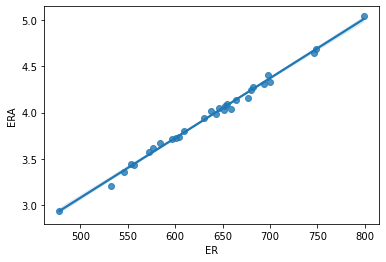

In [54]:
sns.regplot(x='ER',y='ERA',data=data)

R is weakly related to ER and ERA and ER and ERA are strongly related to eachother

<AxesSubplot:xlabel='H', ylabel='W'>

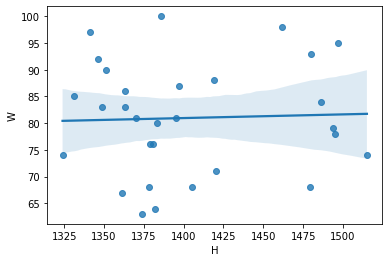

In [56]:
sns.regplot(x='H', y='W', data=data)

<AxesSubplot:xlabel='AB', ylabel='W'>

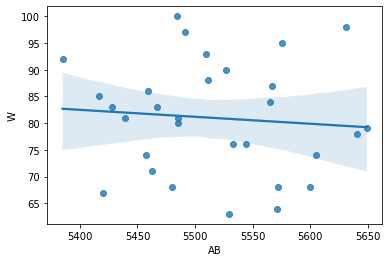

In [57]:
sns.regplot(x='AB', y='W', data=data)

<AxesSubplot:xlabel='H', ylabel='AB'>

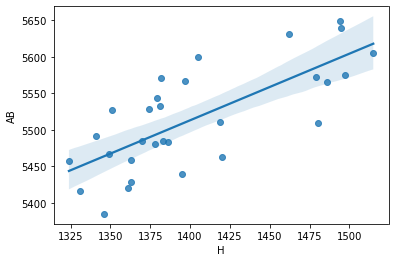

In [58]:
sns.regplot(x='H', y='AB', data=data)

H and AB are weekly related to win and they both are relatively strongly related.

checking Skewness

In [59]:
x = data.drop(columns = ['W'])
y = data['W']

In [60]:
x.skew().sort_values(ascending = False)

R         1.200786
E         0.890132
CG        0.736845
H         0.670254
SV        0.657524
SHO       0.565790
HR        0.516441
SB        0.479893
AB        0.183437
BB        0.158498
Triple    0.129502
ER        0.058710
ERA       0.053331
RA        0.045734
SO       -0.156065
Double   -0.230650
dtype: float64

There seems to be skewness present in the data, ranging from -0.23 to +1.20.

In [61]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [62]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

E         0.063909
SO        0.041170
SHO       0.006560
ERA       0.001746
SV        0.000836
R         0.000000
AB        0.000000
H         0.000000
HR       -0.000065
ER       -0.001940
BB       -0.007760
RA       -0.008082
SB       -0.010455
Double   -0.035315
CG       -0.059785
Triple   -0.072933
dtype: float64

In [63]:

x = pd.DataFrame(x_new, columns = x.columns)

x.head()

,R,AB,H,Double,Triple,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.0,0.0,0.0,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.660331,-0.497425,-0.500893,-0.359844,-0.789579,1.546378,-0.334953
1,0.0,0.0,0.0,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.175465,0.257974,0.261806,-0.359844,0.251775,0.360444,-0.532211
2,0.0,0.0,0.0,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.674621,-0.746906,-0.636459,1.993513,-0.245393,-0.607594,-1.342331
3,0.0,0.0,0.0,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.189512,0.113575,0.060804,1.220103,-0.510759,-0.764453,0.678524
4,0.0,0.0,0.0,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.603228,1.582654,1.520959,1.220103,0.251775,-1.095010,-0.532211


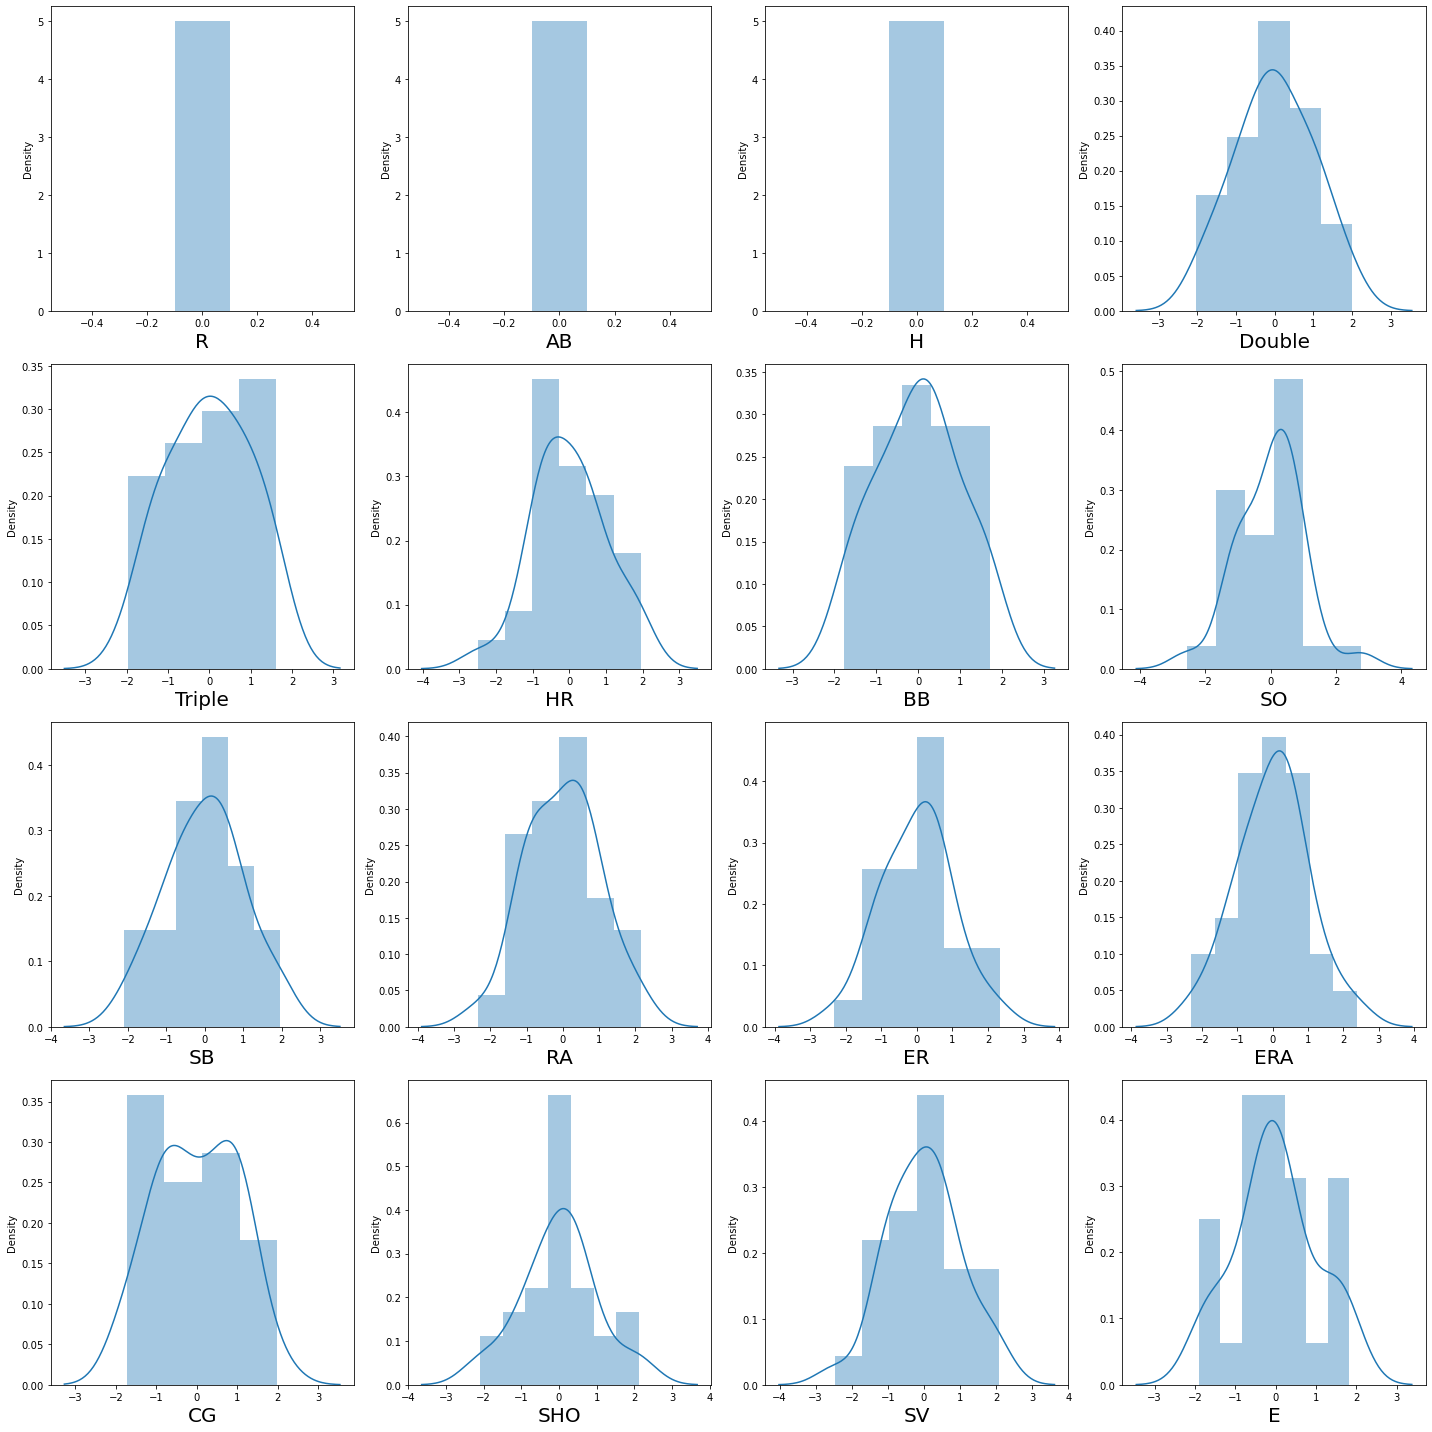

In [64]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

the skewness is removed and data looks clean

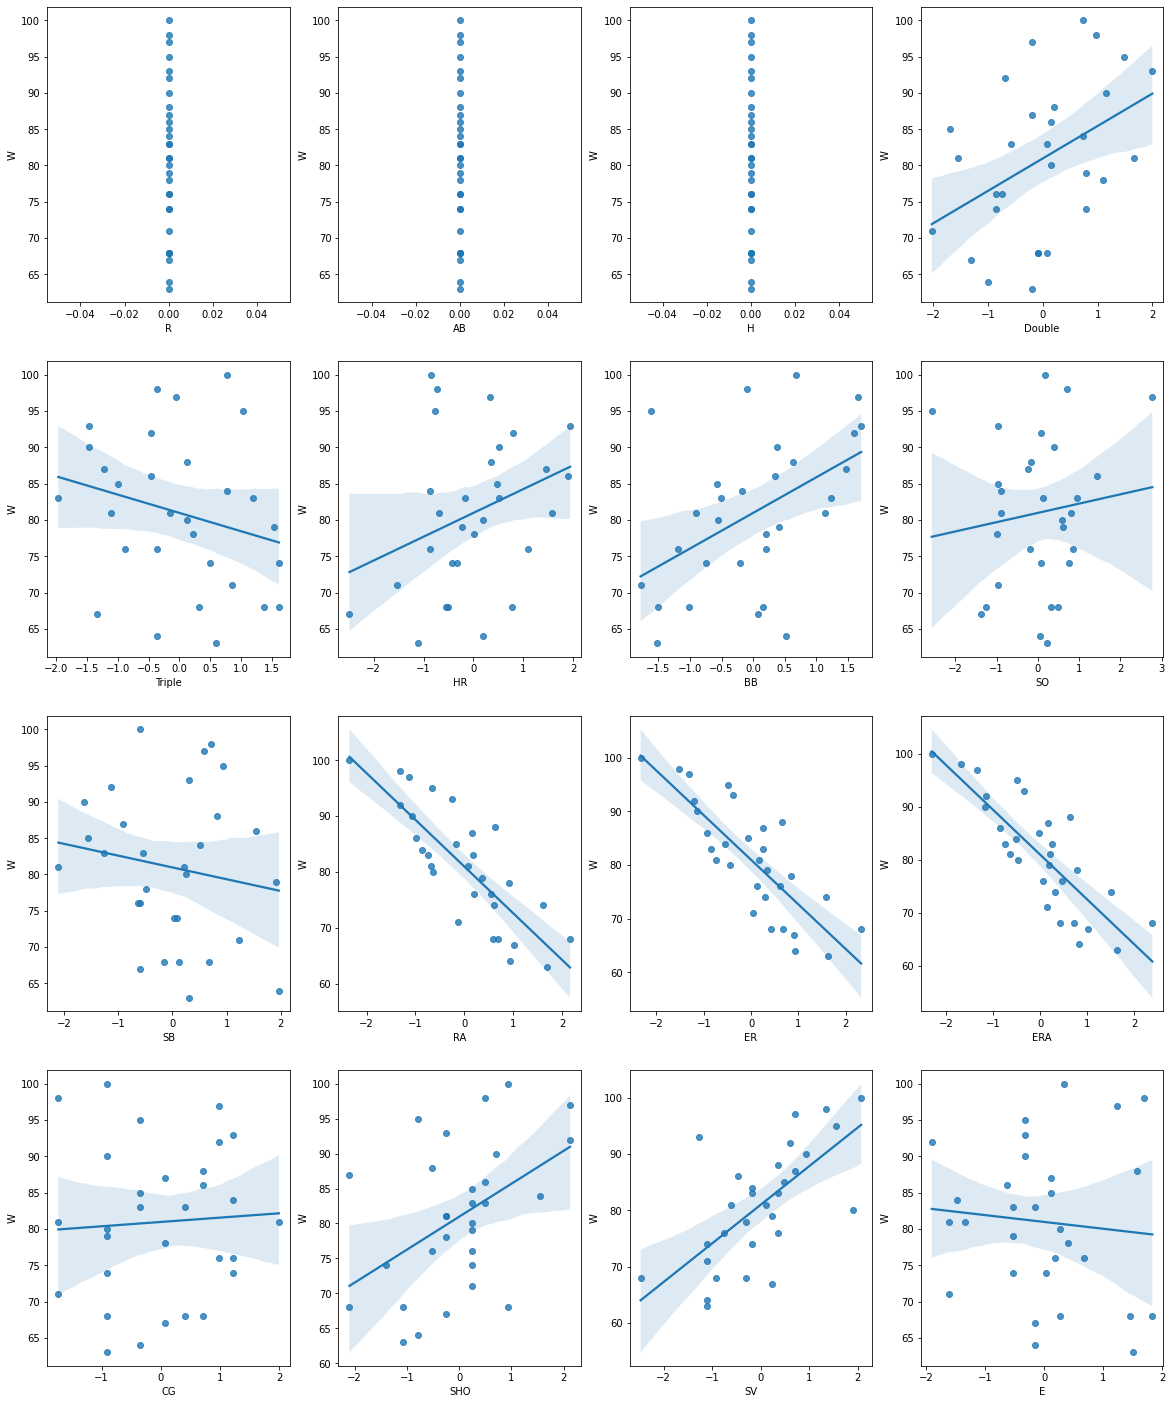

In [65]:
plt.figure(figsize=(20,25))
fignumber = 1

for column in x:
    if fignumber<= 16:
        ax = plt.subplot(4,4,fignumber)
        sns.regplot(x[column],y)
        
    fignumber +=1
plt.show()

Double,HR,BB,SHO,SV are highly positively  linearly related
RA,ER,ERA are highly negatively linearly related


Checking Outliers

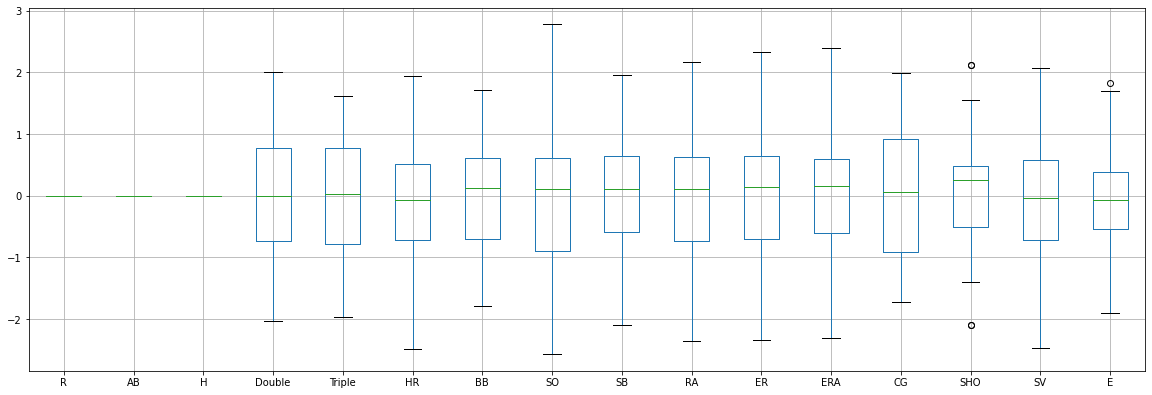

In [66]:

x.iloc[:,:].boxplot(figsize = (20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [67]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

R         False
AB        False
H         False
Double     True
Triple     True
HR         True
BB         True
SO         True
SB         True
RA         True
ER         True
ERA        True
CG         True
SHO        True
SV         True
E          True
dtype: bool

Checking Multicollinearity using VIF

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


In [70]:
vif

,vif,features
0,NaN,R
1,NaN,AB
2,NaN,H
3,2.221041,Double
4,2.697792,Triple
5,2.867884,HR
6,3.331177,BB
7,2.321817,SO
8,1.888334,SB
9,177.760829,RA


In [71]:
x_new = x.drop(columns = ['ER'], axis=1)

x_new.head()

,R,AB,H,Double,Triple,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.0,0.0,0.0,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.660331,-0.500893,-0.359844,-0.789579,1.546378,-0.334953
1,0.0,0.0,0.0,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.175465,0.261806,-0.359844,0.251775,0.360444,-0.532211
2,0.0,0.0,0.0,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.674621,-0.636459,1.993513,-0.245393,-0.607594,-1.342331
3,0.0,0.0,0.0,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.189512,0.060804,1.220103,-0.510759,-0.764453,0.678524
4,0.0,0.0,0.0,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.603228,1.520959,1.220103,0.251775,-1.095010,-0.532211


In [72]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_new)

In [73]:
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x_new.columns

In [74]:
vif

,vif,features
0,NaN,R
1,NaN,AB
2,NaN,H
3,2.204932,Double
4,2.633668,Triple
5,2.132582,HR
6,3.215413,BB
7,2.106638,SO
8,1.614637,SB
9,92.211410,RA


As it can be easily seen that there is a significant drop in VIF value, but still it is high

In [75]:
x_new = x_new.drop(columns = ['ERA'], axis=1)

x_new.head()

,R,AB,H,Double,Triple,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,0.0,0.0,0.0,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.660331,-0.359844,-0.789579,1.546378,-0.334953
1,0.0,0.0,0.0,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.175465,-0.359844,0.251775,0.360444,-0.532211
2,0.0,0.0,0.0,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.674621,1.993513,-0.245393,-0.607594,-1.342331
3,0.0,0.0,0.0,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.189512,1.220103,-0.510759,-0.764453,0.678524
4,0.0,0.0,0.0,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.603228,1.220103,0.251775,-1.095010,-0.532211


In [76]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_new)

In [77]:
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x_new.columns

In [78]:
vif

,vif,features
0,NaN,R
1,NaN,AB
2,NaN,H
3,1.872458,Double
4,2.528202,Triple
5,1.838484,HR
6,2.780222,BB
7,1.789207,SO
8,1.600073,SB
9,3.779498,RA


ML Models

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [80]:
max_r2_score = 0
maxRS = 0

for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    r2score = r2_score(y_test,y_pred)
    print('r2_score', r2score*100,'%', 'random_state', i)
    
    if r2score > max_r2_score:
        max_r2_score = r2score
        maxRS = i
        print('r2_score', max_r2_score*100,'%', 'random_state', i)

r2_score 44.14917154263108 % random_state 1
r2_score 44.14917154263108 % random_state 1
r2_score -27.026251319449845 % random_state 2
r2_score 25.76345460706374 % random_state 3
r2_score 76.64585444316131 % random_state 4
r2_score 76.64585444316131 % random_state 4
r2_score 56.46016736804489 % random_state 5
r2_score 78.42026682386519 % random_state 6
r2_score 78.42026682386519 % random_state 6
r2_score 72.41137328499967 % random_state 7
r2_score 65.81234956630765 % random_state 8
r2_score 38.48132207261161 % random_state 9
r2_score 32.63217726408304 % random_state 10
r2_score 25.69957635882203 % random_state 11
r2_score -31.322023215943574 % random_state 12
r2_score 40.16711985967003 % random_state 13
r2_score 72.07796966081337 % random_state 14
r2_score 25.37140600011426 % random_state 15
r2_score 26.469632358494056 % random_state 16
r2_score 52.66460556505177 % random_state 17
r2_score 34.56477998106803 % random_state 18
r2_score 77.59778722221907 % random_state 19
r2_score 34.37905

In [81]:
print('Best R2 Score is', max_r2_score, 'on Random_state', maxRS)

Best R2 Score is 0.9311951150711744 on Random_state 812


In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 812)

In [83]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [84]:
print('Intercept: ', reg.intercept_)
print('Linear Coefficient: ', reg.coef_)

Intercept:  81.16443415081112
Linear Coefficient:  [ 0.00000000e+00  1.77635684e-15  4.44089210e-16  2.45898201e+00
  4.15746011e-01  2.55273790e+00  7.24769603e-01 -8.63359293e-01
 -4.84301523e-01 -5.42630114e+00  2.46684078e-01  9.06909873e-01
  3.35617738e+00  6.76602771e-01]


In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('R2 Score: ', r2_score(y_test, y_pred))

print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))

print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))

print("Square Root of Mean Square Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score:  0.9311951150711744
Mean Absolute Error:  2.1985325946479737
Mean Squared Error:  6.24404330729093
Square Root of Mean Square Error:  2.498808377465333


Since there seems to be some relation between independent variable --> R (Run) and Target Variable --> W (Win), therefore applying Hypothesis Testing to identify whether relation between them exists or not.

Hypothesis Testing and P-Values
Ho = there is no relation between Run and Win.
Ha = There exists a relation between Run and Win.

In [87]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'W ~ R', data = data).fit()

lm.pvalues

Intercept    0.188745
R            0.017488
dtype: float64

Since pvalue is less than 0.5 , it states there is a relation between R and W

In [88]:
lm.rsquared

0.18554602127597397

In [89]:
lm = LinearRegression()
lm.fit(x_scaled,y)

print('Intercept: ',lm.intercept_)
print('R: ', lm.coef_[0])
print('AB: ', lm.coef_[1])
print('H: ', lm.coef_[2])
print('Double: ', lm.coef_[3])
print('Triple: ', lm.coef_[4])
print('HR: ', lm.coef_[5])
print('BB: ', lm.coef_[6])
print('SO: ', lm.coef_[7])
print('SB: ', lm.coef_[8])
print('RA: ', lm.coef_[9])
print('CG: ', lm.coef_[10])
print('SHO: ', lm.coef_[11])
print('SV: ', lm.coef_[12])
print('E: ', lm.coef_[13])

Intercept:  80.96666666666667
R:  0.0
AB:  -2.220446049250313e-15
H:  8.881784197001252e-16
Double:  1.612399464664409
Triple:  0.9559322721587493
HR:  3.0838035516358335
BB:  0.6417335300596045
SO:  -1.3137521912705772
SB:  -0.37246853122891593
RA:  -5.631441963175693
CG:  0.6757431082555234
SHO:  0.5005722272497652
SV:  3.6206299357898306
E:  1.1139296234338019


In [90]:

lm = smf.ols(formula = 'W ~ R + AB + H + Double + Triple + HR + BB + SO + SB +RA + CG + SHO + SV + E', data = data).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     15.64
Date:                Mon, 22 May 2023   Prob (F-statistic):           1.82e-06
Time:                        00:11:15   Log-Likelihood:                -71.258
No. Observations:                  30   AIC:                             172.5
Df Residuals:                      15   BIC:                             193.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1071     79.580      0.077      0.940    -163.514     175.728
R              0.1459      0.038      3.819      0.002       0.064       0.227
AB             0.0123      0.020      0.605      0.555      -0.031       0.055
H             -0.0253      0.035     -0.721      0.482      -0.100       0.049
Double        -0.1054      0.072     -1.458      0.166      -0.260       0.049
Triple        -0.0398      0.113     -0.351      0.730      -0.281       0.202
HR            -0.1056      0.059     -1.785      0.094      -0.232       0.020
BB            -0.0181      0.023     -0.804      0.434      -0.066       0.030
SO             0.0090      0.010      0.928      0.368      -0.012       0.030
SB            -0.0120      0.041     -0.296      0.771      -0.099       0.075
RA            -0.0680      0.021     -3.189      0.006      -0.114      -0.023
CG             0.8753      0.408      2.145      0.049       0.005       1.745
SHO            0.2593      0.305      0.850      0.409      -0.391       0.910
SV             0.6900      0.153      4.506      0.000       0.364       1.016
E             -0.0089      0.070     -0.126      0.901      -0.159       0.141
==============================================================================
Omnibus:                        7.233   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                5.532
Skew:                          -0.843   Prob(JB):                       0.0629
Kurtosis:                       4.257   Cond. No.                     7.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1  P value for R, HR, SV and RA is very low, that means there is a strong relation between these variables and Win.

2  p value for E is 0.975, which is very high. we can assume that E does not have any significant effect on Win.

3  R2 and Adj. R2 values are 0.936 and 0.876 respectively, which means the intercept model is very good.

R+HR+RA+SV has a great relation with the target W(win)

In [93]:
lm = smf.ols(formula = 'W ~ AB+E', data = data).fit()

lm.rsquared

0.011956169381317272

AB+E has less relation with W (win)

In [95]:
lm = smf.ols(formula = 'W ~  H + Double + Triple + BB + SO + SB + CG + SHO', data = data).fit()

lm.rsquared

0.5489667438363384

H + Double + Triple + BB + SO + SB + CG + SHO all datas are moderately related to W (win)

In [96]:
def print_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n")
        
        print(f"R2 Score: {r2_score(y_train, y_pred)}")
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n")
        
        print(f"R2 Score: {r2_score(y_test, pred)}")
        
        print(f"Root Mean Square Error : {np.sqrt(mean_squared_error(y_test,pred))} ")

In [97]:
reg = LinearRegression()

# Regression Model training and printing train and test score
reg.fit(x_train, y_train)

# call the function and pass dataset to check train and test score
print_score(reg, x_train, x_test, y_train, y_test, train=True)

print_score(reg, x_train, x_test, y_train, y_test, train=False)



R2 Score: 0.8249272123619766


R2 Score: 0.9311951150711744
Root Mean Square Error : 2.498808377465333 


In [98]:
from sklearn.svm import SVC

svc = SVC()

# SVC Model training and printing train and test score
svc.fit(x_train, y_train)

# call the function and pass dataset to check train and test score
print_score(svc, x_train, x_test, y_train, y_test, train=True)

print_score(svc, x_train, x_test, y_train, y_test, train=False)



R2 Score: 0.7553871081891494


R2 Score: 0.4118457300275482
Root Mean Square Error : 7.305819598101229 


In [99]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# RandomForestClassifier Model training and printing train and test score
rf.fit(x_train, y_train)

# call the function and pass dataset to check train and test score
print_score(rf, x_train, x_test, y_train, y_test, train=True)

print_score(rf, x_train, x_test, y_train, y_test, train=False)



R2 Score: 0.8911043636973162


R2 Score: 0.7878856749311293
Root Mean Square Error : 4.3874109677576385 


In [100]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

# XGBoost Regressor Model training and printing train and test score
xgb.fit(x_train, y_train)

# call the function and pass dataset to check train and test score
print_score(xgb, x_train, x_test, y_train, y_test, train=True)

print_score(xgb, x_train, x_test, y_train, y_test, train=False)



R2 Score: 0.9999999979611502


R2 Score: 0.9040807411418592
Root Mean Square Error : 2.9503682382672625 


In [101]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

# KNN Regressor Model training and printing train and test score
knn.fit(x_train, y_train)

# call the function and pass dataset to check train and test score
print_score(knn, x_train, x_test, y_train, y_test, train=True)

print_score(knn, x_train, x_test, y_train, y_test, train=False)



R2 Score: 0.4664243011193263


R2 Score: 0.5165840220385677
Root Mean Square Error : 6.623443213314355 


Model Regularization Method

In [102]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [103]:

lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [104]:
alpha = lasscv.alpha_

alpha

0.28317185933657096

In [105]:
lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.28317185933657096)

In [106]:
lasso_reg.score(x_test,y_test)

0.8929687168723229

Ridge CV

In [107]:
ridgecv = RidgeCV(alphas = np.arange(0.001,2,0.01), normalize = True)

ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2.110e-01, 2.210e-01, 2.310e-01,
       2.410e-01, 2.510e-01, 2.610e-01, 2.710e-01, 2.810e-01, 2.910e-01,
       3.010e-01, 3.110e-01, 3.210e-0...
       1.621e+00, 1.631e+00, 1.641e+00, 1.651e+00, 1.661e+00, 1.671e+00,
       1.681e+00, 1.691e+00, 1.701e+00, 1.711e+00, 1.721e+00, 1.731e+00,
       1.741e+00, 1.751e+00, 1.761e+00, 1.771e+00, 1.781e+00, 1.791e+00,
       1.801e+00, 1.811e+00, 1.821e+00, 1.831e+00, 1.841e+00, 1.851e+00,
       1.861e+00, 1.871e+00, 1.881e+00, 1.891e+00, 1.901e+00, 1.911e+00,
       1.921e+00, 1.931e+00, 1.941e+00, 1.951e+00, 1.961e+00, 1.971e+00,
       1.981e+00, 1.991e+00]),
        normalize=True)

In [108]:
alpha = ridgecv.alpha_

alpha

0.49099999999999994

In [109]:
ridge_model = Ridge(alpha)

ridge_model.fit(x_train,y_train)

Ridge(alpha=0.49099999999999994)

In [110]:
ridge_model.score(x_test,y_test)

0.9276401771841915

model saving

In [111]:
import joblib
joblib.dump(reg, "Baseball_Case_Study.pkl")

['Baseball_Case_Study.pkl']